In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
STOPWORDS = set(stopwords.words('english'))
from nltk.stem import PorterStemmer
from sklearn.preprocessing import LabelEncoder
import spacy

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB
import seaborn as sns
import pickle

[nltk_data] Downloading package stopwords to C:\Users\Sai
[nltk_data]     Charan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv(r"E:\Jupyter Notebook\Datasets\Sentiment Analysis\combined_sentiment_data.csv")
df

,sentence,sentiment
0,So there is no way for me to plug it in here i...,negative
1,"Good case, Excellent value.",positive
2,Great for the jawbone.,positive
3,Tied to charger for conversations lasting more...,negative
4,The mic is great.,positive
...,...,...
3304,Online anonymity enables freedom of expression...,negative
3305,Smart cities leverage data and technology to i...,positive
3306,Biometric identification technologies offer co...,negative
3307,Data ethics guidelines are essential for ensur...,positive


In [3]:
df.dtypes

sentence     object
sentiment    object
dtype: object

In [4]:
df.isna().sum()

sentence     0
sentiment    0
dtype: int64

In [5]:
df['length'] = df.sentence.apply(len)
df

,sentence,sentiment,length
0,So there is no way for me to plug it in here i...,negative,82
1,"Good case, Excellent value.",positive,27
2,Great for the jawbone.,positive,22
3,Tied to charger for conversations lasting more...,negative,79
4,The mic is great.,positive,17
...,...,...,...
3304,Online anonymity enables freedom of expression...,negative,97
3305,Smart cities leverage data and technology to i...,positive,133
3306,Biometric identification technologies offer co...,negative,113
3307,Data ethics guidelines are essential for ensur...,positive,94


In [6]:
print(f"Longest Sentence in the dataset is {max(df.length)} and the text is: \n\n {df.loc[df['length']==max(df.length), 'sentence'].values[0]}")

Longest Sentence in the dataset is 479 and the text is: 

 This is a masterful piece of film-making, with many themes simmering and occasionally boiling over in this warts and all study of the poet's bohemian, self-indulgent wartime years that span the aerial bombardments of London and the outward tranquillity of a Welsh coastal retreat - the borderlines between friendship, lust and love, dedication to art and experience versus practical concerns, jealousy, rivalry, cowardice and egotism versus heroism and self-sacrifice and more.  


##### Crosschecking if len() operator worked correctly by comparing the values

In [7]:
print(f"Length of the text using len() operator on a random text: {len(df.sentence.iloc[10])}")
print(f"Length of the text using len() on Length Column: {df.length.iloc[10]}")

Length of the text using len() operator on a random text: 31
Length of the text using len() on Length Column: 31


In [8]:
le = LabelEncoder()
df['processed_sentiment'] = le.fit_transform(df.sentiment)
df

,sentence,sentiment,length,processed_sentiment
0,So there is no way for me to plug it in here i...,negative,82,0
1,"Good case, Excellent value.",positive,27,1
2,Great for the jawbone.,positive,22,1
3,Tied to charger for conversations lasting more...,negative,79,0
4,The mic is great.,positive,17,1
...,...,...,...,...
3304,Online anonymity enables freedom of expression...,negative,97,0
3305,Smart cities leverage data and technology to i...,positive,133,1
3306,Biometric identification technologies offer co...,negative,113,0
3307,Data ethics guidelines are essential for ensur...,positive,94,1


In [9]:
df.processed_sentiment.unique()

array([0, 1])

###### From the above code we can see we can have two types of output. 0 and 1. 0 represent 'Negative' and 1 represent 'Positive'

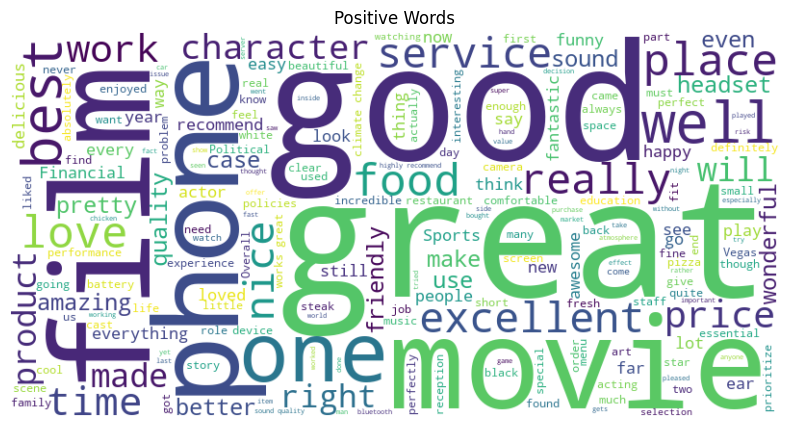

In [10]:
filtered_text = df.loc[df['processed_sentiment']==1,'sentence']
positive_text = ' '.join(filtered_text)
wordcloud = WordCloud(width=800,height=400,background_color='white').generate(positive_text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Positive Words')
plt.axis('off')
plt.show()

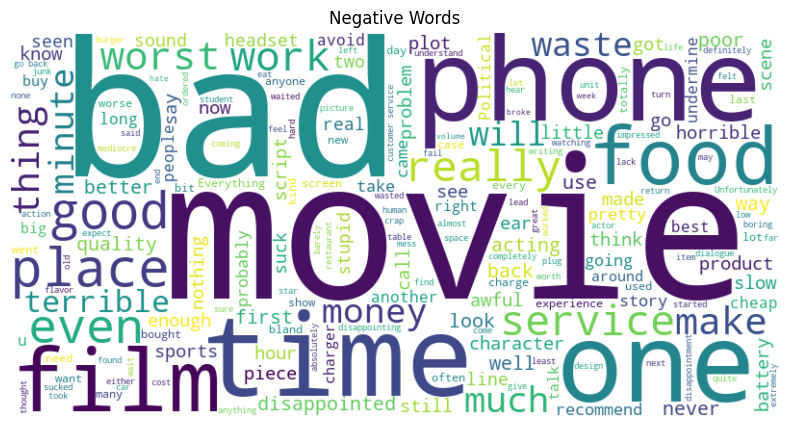

In [11]:
filtered_text = df.loc[df['processed_sentiment']==0,'sentence']
negative_text = ' '.join(filtered_text)
wordcloud = WordCloud(width=800,height=400,background_color='white').generate(negative_text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Words')
plt.show()

In [12]:
print(f"Count of positive count: {(df['processed_sentiment']==1).sum()} \nCount of Negative count: {(df['processed_sentiment']==0).sum()}")

Count of positive count: 1679 
Count of Negative count: 1630


In [13]:
print(f"Percentance of Positive Count is: {(((df['processed_sentiment']==1).sum())/len(df.processed_sentiment))*100} \nPercentance of Negative Count is: {(((df['processed_sentiment']==0).sum())/len(df.processed_sentiment))*100}")

Percentance of Positive Count is: 50.74040495618012 
Percentance of Negative Count is: 49.259595043819886


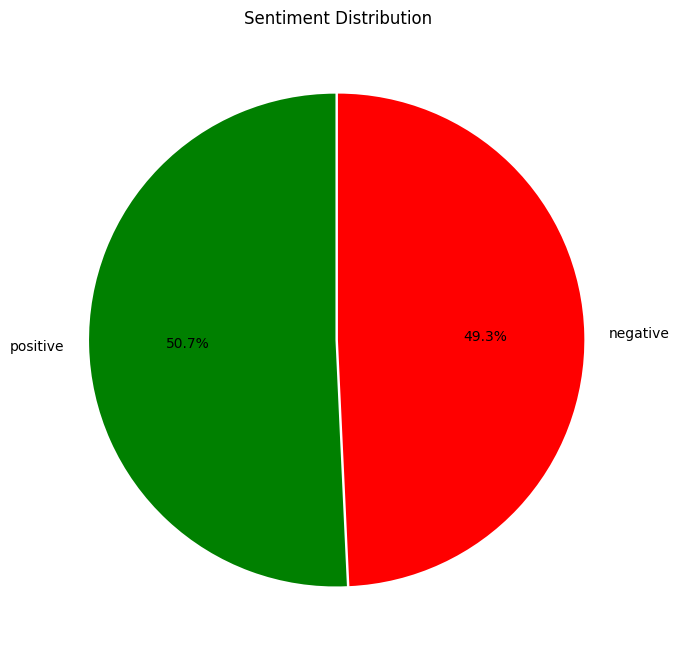

In [14]:

label = ['positive','negative']
sizes = [(((df['processed_sentiment']==1).sum())/len(df.processed_sentiment))*100, (((df['processed_sentiment']==0).sum())/len(df.processed_sentiment))*100]
colors = ['green', 'red']
explode = [0.01,0]

plt.figure(figsize=(8,8))
plt.pie(sizes, labels=label, colors=colors, explode=explode,autopct='%1.1f%%', startangle=90)
plt.title('Sentiment Distribution')
plt.show()

In [15]:
# stemmer = PorterStemmer()
# def stemming(text):
#     words = text.split()
#     stemmed_text = [stemmer.stem(text) for word in words if word.lower() not in STOPWORDS ]
#     return stemmed_text[0]
nlp = spacy.load('en_core_web_sm')
def lemmatization(text):
    # Process the entire text with spaCy
    doc = nlp(text)
    # Lemmatize and remove stopwords
    lemmatized_text = [token.lemma_ for token in doc if token.text.lower() not in STOPWORDS and not token.is_punct]
    # Join the lemmatized tokens back into a single string
    return ' '.join(lemmatized_text)

In [16]:
df['processed_text'] = df.sentence.apply(lemmatization)
df

,sentence,sentiment,length,processed_sentiment,processed_text
0,So there is no way for me to plug it in here i...,negative,82,0,way plug US unless go converter
1,"Good case, Excellent value.",positive,27,1,good case excellent value
2,Great for the jawbone.,positive,22,1,great jawbone
3,Tied to charger for conversations lasting more...,negative,79,0,tie charger conversation last 45 minute MAJOR ...
4,The mic is great.,positive,17,1,mic great
...,...,...,...,...,...
3304,Online anonymity enables freedom of expression...,negative,97,0,online anonymity enable freedom expression als...
3305,Smart cities leverage data and technology to i...,positive,133,1,smart city leverage datum technology improve u...
3306,Biometric identification technologies offer co...,negative,113,0,biometric identification technology offer conv...
3307,Data ethics guidelines are essential for ensur...,positive,94,1,datum ethic guideline essential ensure respons...


In [17]:
x = df.processed_text
y = df.processed_sentiment
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42)

In [18]:
vectoriser = TfidfVectorizer()
x_train_vec = vectoriser.fit_transform(x_train)
x_test_vec = vectoriser.transform(x_test)

Accuracy of model using RandomForestClassifier(n_jobs=-1): 
Accuracy score: 0.8164251207729468 
Model predicted score: 0.8164251207729468
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       431
           1       0.84      0.77      0.80       397

    accuracy                           0.82       828
   macro avg       0.82      0.81      0.82       828
weighted avg       0.82      0.82      0.82       828



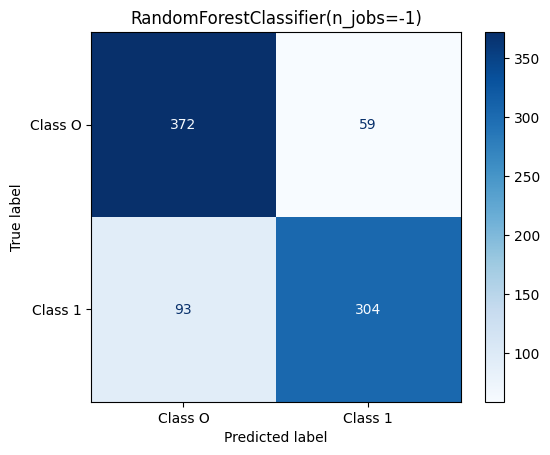

Accuracy of model using LogisticRegression(): 
Accuracy score: 0.8200483091787439 
Model predicted score: 0.8200483091787439
              precision    recall  f1-score   support

           0       0.84      0.81      0.82       431
           1       0.80      0.83      0.82       397

    accuracy                           0.82       828
   macro avg       0.82      0.82      0.82       828
weighted avg       0.82      0.82      0.82       828



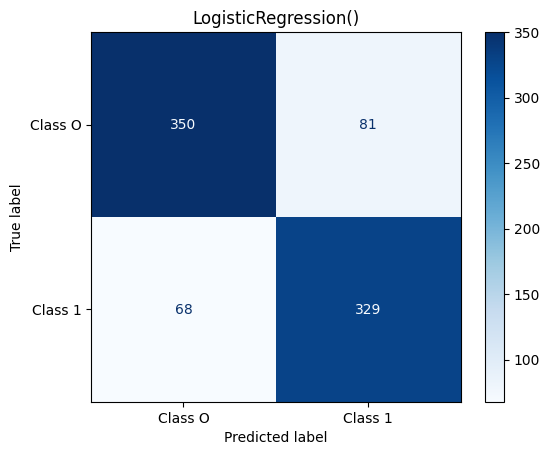

Accuracy of model using SVC(): 
Accuracy score: 0.8236714975845411 
Model predicted score: 0.8236714975845411
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       431
           1       0.81      0.83      0.82       397

    accuracy                           0.82       828
   macro avg       0.82      0.82      0.82       828
weighted avg       0.82      0.82      0.82       828



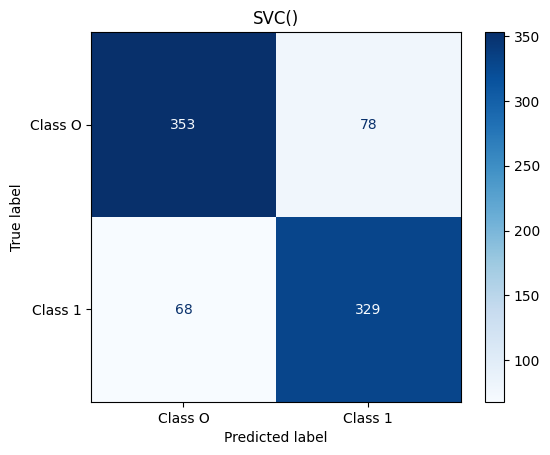

Accuracy of model using MultinomialNB(): 
Accuracy score: 0.8140096618357487 
Model predicted score: 0.8140096618357487
              precision    recall  f1-score   support

           0       0.84      0.79      0.82       431
           1       0.79      0.84      0.81       397

    accuracy                           0.81       828
   macro avg       0.81      0.81      0.81       828
weighted avg       0.82      0.81      0.81       828



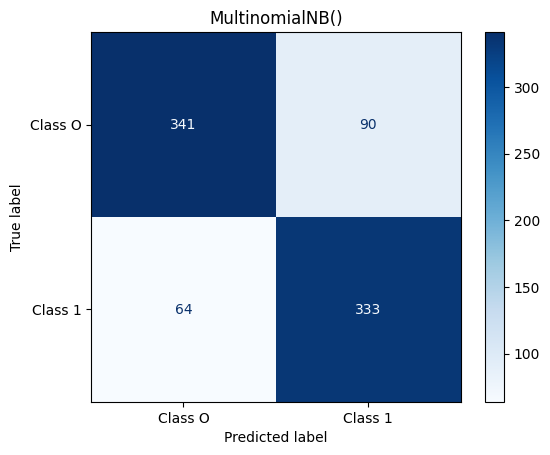

In [19]:
models = [RandomForestClassifier(n_jobs=-1), LogisticRegression(), SVC(), MultinomialNB()]

for m in models:
    model = m.fit(x_train_vec,y_train)
    y_pred = model.predict(x_test_vec)
    accuracy = accuracy_score(y_test, y_pred)
    model_score = model.score(x_test_vec,y_test)
    print(f"Accuracy of model using {m}: \nAccuracy score: {accuracy} \nModel predicted score: {model_score}")
    print(classification_report(y_test,y_pred, target_names=None, output_dict= False))
    cm = confusion_matrix(y_test,y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class O', 'Class 1'])
    disp.plot(cmap = 'Blues')
    plt.title(m)
    plt.show()
    
    

In [20]:
model = MultinomialNB()
model.fit(x_train_vec,y_train)

MultinomialNB()

In [46]:
text = ['I love kotak business']
for t in text:
    doc = nlp(t)
    lemmatized_text = [token.lemma_ for token in doc if token.text.lower() not in STOPWORDS and not token.is_punct]
    processed_text = ' '.join(lemmatized_text)
    print(processed_text)
    text_vec = vectoriser.transform([processed_text])
    pred = model.predict(text_vec)
    predicted_label.append(pred[0])
    print(pred[0])

# match = [pl for pl,tl in zip(predicted_label,true_label) if pl == tl]
        
# print(f"Total Accuracy after testing is: {((len(match))/len(true_label))*100}%")

score get decrease
1


In [40]:
sentences = [
    "I absolutely love this product, it's amazing!",  # Positive
    "The service was terrible and disappointing.",  # Negative
    "Today is such a beautiful day!",  # Positive
    "I regret buying this item, it was a waste of money.",  # Negative
    "The movie was fantastic and full of surprises.",  # Positive
    "This is the worst experience I’ve ever had.",  # Negative
    "I'm so happy with my results, everything worked perfectly!",  # Positive
    "I’m not satisfied with the quality of the product.",  # Negative
    "What a wonderful experience, I will definitely recommend this!",  # Positive
    "The customer support was unhelpful and frustrating.",  # Negative
    "The food at the restaurant was delicious and perfectly cooked.",  # Positive
    "The app keeps crashing and doesn’t work at all.",  # Negative
    "I feel so energized and motivated today!",  # Positive
    "The delivery was late, and the package was damaged.",  # Negative
    "This phone has an excellent camera and great battery life.",  # Positive
    "I wouldn’t recommend this to anyone, it’s horrible.",  # Negative
    "The staff was friendly and made me feel welcome.",  # Positive
    "The design is flawed, and it’s very hard to use.",  # Negative
    "I had the best vacation of my life, it was incredible!",  # Positive
    "The room was dirty, and the sheets were stained.",  # Negative
    "The event was organized perfectly, and everyone enjoyed it.",  # Positive
    "The product stopped working after just one week.",  # Negative
    "I’m thrilled with how smoothly everything went!",  # Positive
    "The instructions were confusing and poorly written.",  # Negative
    "The scenery was breathtaking and left me speechless.",  # Positive
    "The noise from the construction made it impossible to concentrate.",  # Negative
    "I appreciate the quick and efficient service provided.",  # Positive
    "The software is full of bugs and glitches.",  # Negative
    "This workout routine has really improved my fitness.",  # Positive
    "The cancellation process was unnecessarily difficult and slow.",  # Negative
    "The concert was lively, and the performers were amazing.",  # Positive
    "The website is slow and crashes frequently.",  # Negative
    "The hotel staff went above and beyond to make my stay comfortable.",  # Positive
    "I was overcharged, and the customer service didn’t help.",  # Negative
    "The tutorial was clear and easy to follow.",  # Positive
    "The machine broke down on the first use.",  # Negative
    "I loved the presentation; it was so informative.",  # Positive
    "The waiting time was excessive, and no one provided updates.",  # Negative
    "The park was peaceful, and the flowers were beautiful.",  # Positive
    "The package arrived late and was in terrible condition.",  # Negative
    "This skincare routine has made my skin glow!",  # Positive
    "The heater doesn’t work properly, and it’s freezing.",  # Negative
    "The team was very cooperative and supportive throughout.",  # Positive
    "The meeting was disorganized and a waste of time.",  # Negative
    "The book was inspiring and a joy to read.",  # Positive
    "The product description was misleading and incorrect.",  # Negative
    "The decorations at the party were stunning.",  # Positive
    "The chairs were uncomfortable, and the room was too hot.",  # Negative
    "The music lifted my spirits and made my day.",  # Positive
    "The repair service took way too long to complete.",  # Negative
    "The new software update fixed all the issues.",  # Positive
    "The traffic was horrible, and it ruined my mood."  # Negative
]

sentiments = [
    1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 
    1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 
    1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 
    1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 
    1, 0, 1, 0, 1, 0
]


In [41]:
predicted_label = []
match = []

for sent, sentiment in zip(sentences, sentiments):
    print(sent)
    doc = nlp(sent)
    lemmatized_text = [token.lemma_ for token in doc if token.text.lower() not in STOPWORDS and not token.is_punct]
    processed_text = ' '.join(lemmatized_text)
    print(processed_text)
    text_vec = vectoriser.transform([processed_text])
    pred = model.predict(text_vec)
    predicted_label.append(pred[0])
    if pred[0] == sentiment:
        match.append(pred[0])
    print(pred[0])
    
print(f"Total Accuracy of the model is {((len(match))/(len(sentiments)))*100}")
    

I absolutely love this product, it's amazing!
absolutely love product be amazing
1
The service was terrible and disappointing.
service terrible disappointing
0
Today is such a beautiful day!
today beautiful day
1
I regret buying this item, it was a waste of money.
regret buy item waste money
0
The movie was fantastic and full of surprises.
movie fantastic full surprise
1
This is the worst experience I’ve ever had.
bad experience have ever
0
I'm so happy with my results, everything worked perfectly!
be happy result everything work perfectly
1
I’m not satisfied with the quality of the product.
be satisfied quality product
1
What a wonderful experience, I will definitely recommend this!
wonderful experience definitely recommend
1
The customer support was unhelpful and frustrating.
customer support unhelpful frustrating
0
The food at the restaurant was delicious and perfectly cooked.
food restaurant delicious perfectly cooked
1
The app keeps crashing and doesn’t work at all.
app keep crash

In [49]:
export_objects = {
    'nlp': nlp,
    'vectoriser': vectoriser,
    'model': model
}

with open("Sentiment Analyzer.pkl", 'wb') as f:
    pickle.dump(export_objects, f)